https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('OnlineNewsPopularity.csv', header=0)
names = df.columns
stripped = [s.strip() for s in names]
df.columns=stripped

Analiza eksploracyjna danych

In [2]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Odrzucanie url i timedelta jako nierelewantne

In [3]:
df.drop(columns=['url', 'timedelta'],inplace=True)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Sprawdzenie ilości danych NULL w każdej z cech.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

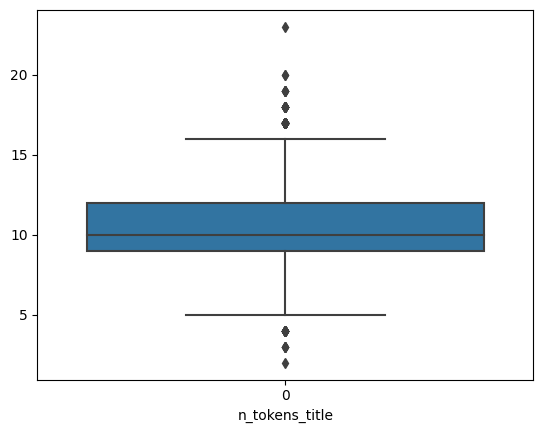

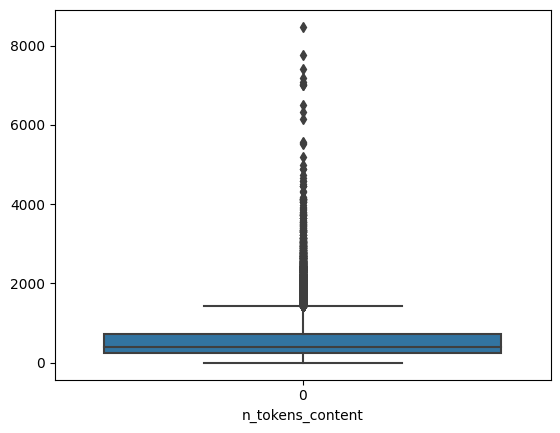

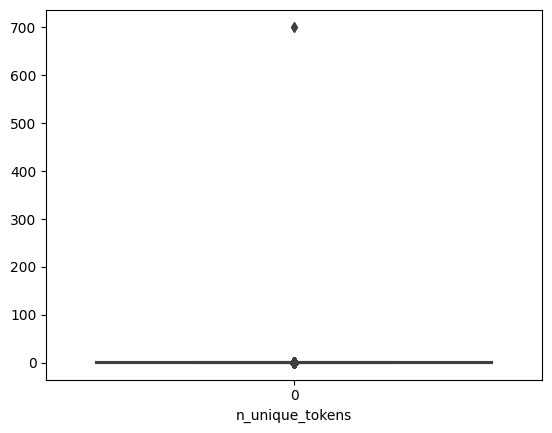

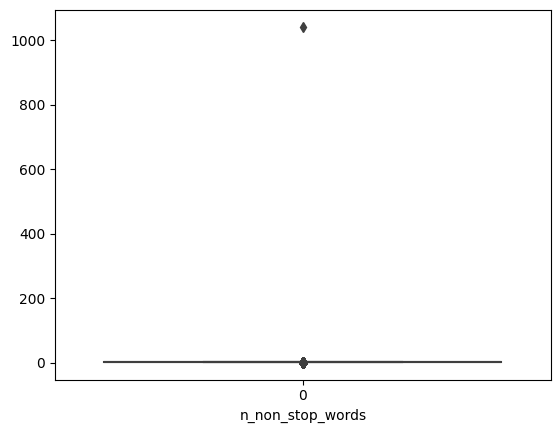

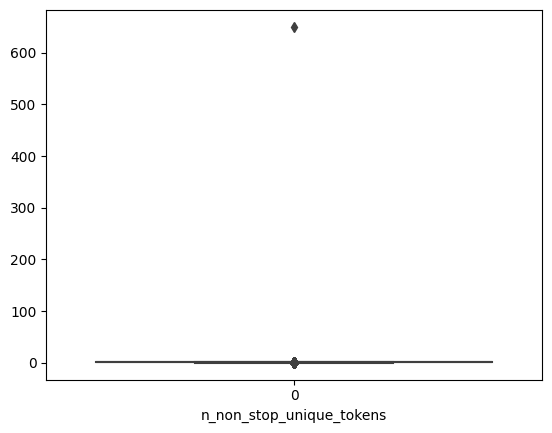

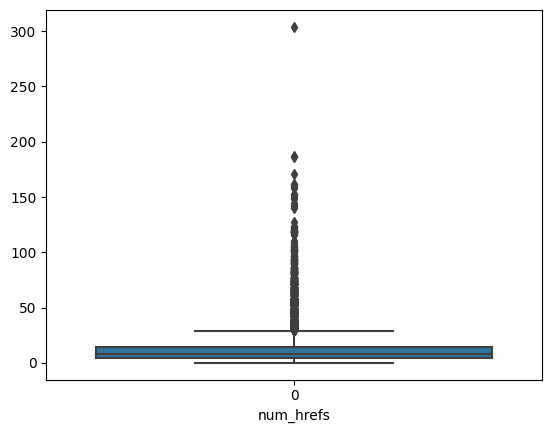

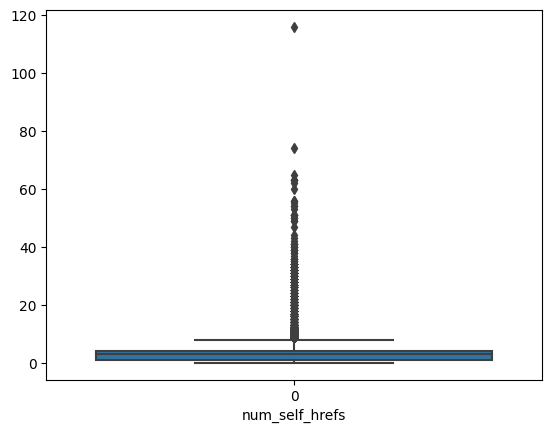

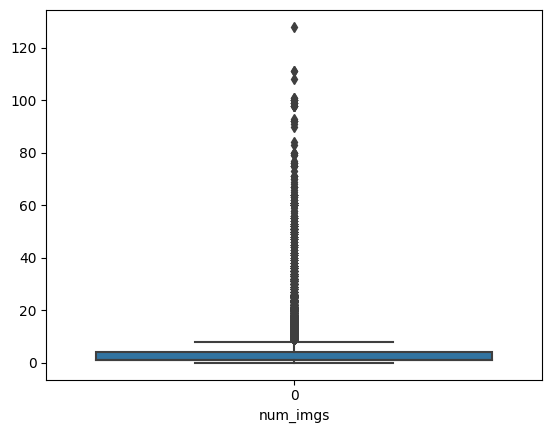

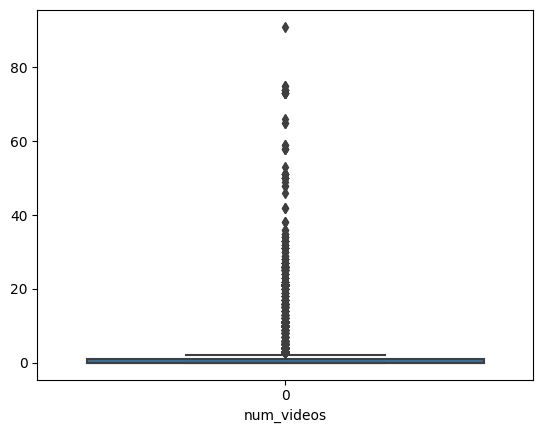

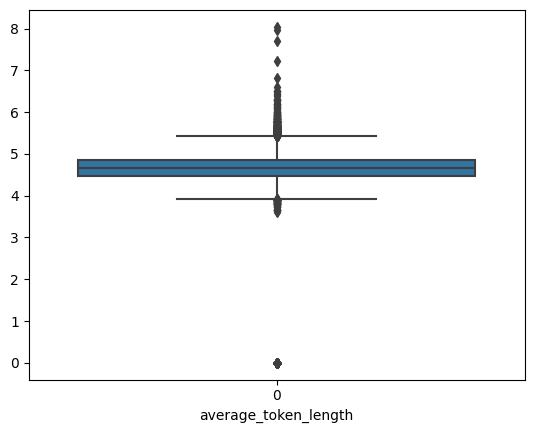

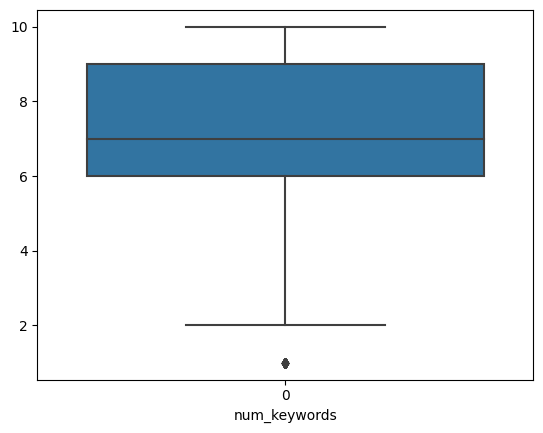

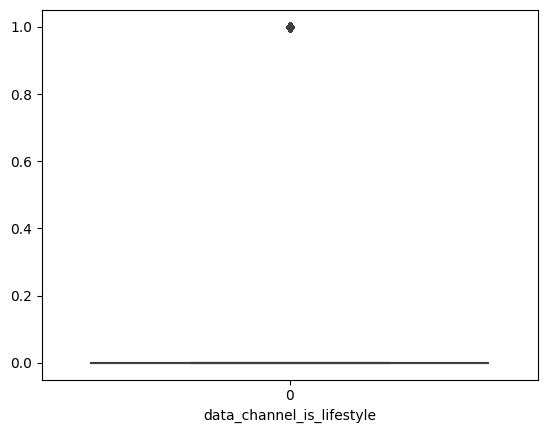

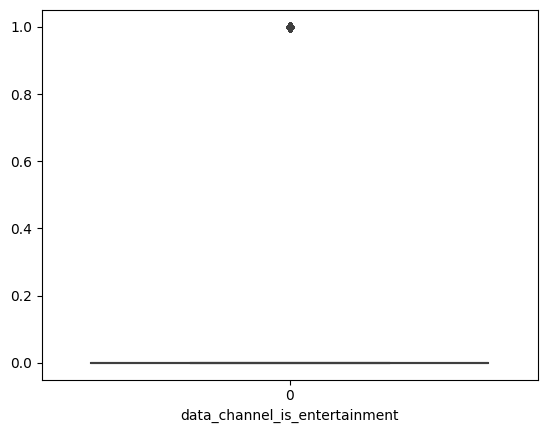

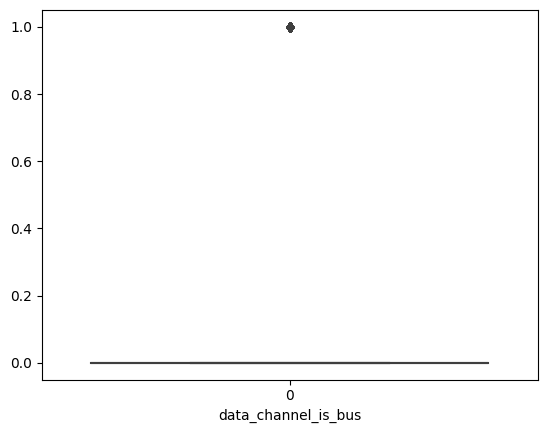

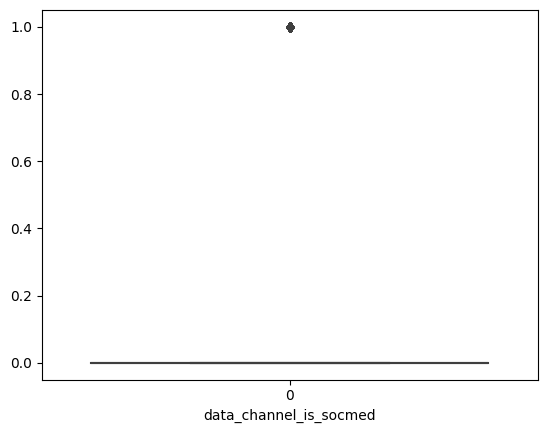

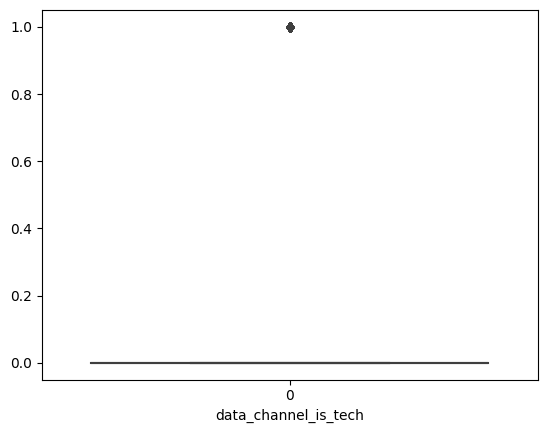

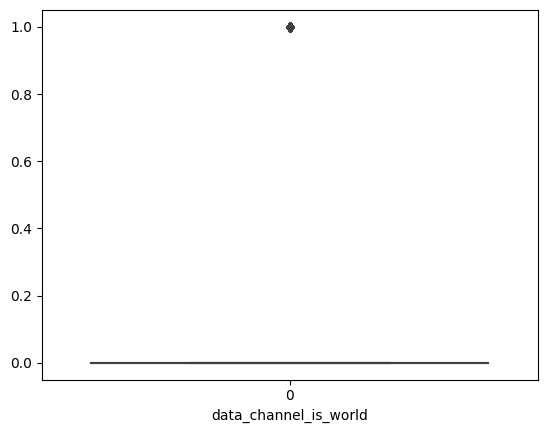

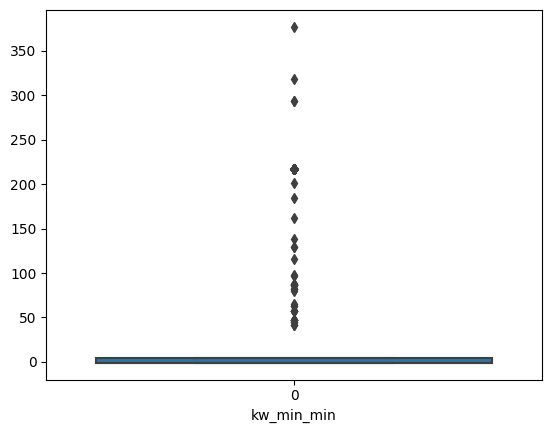

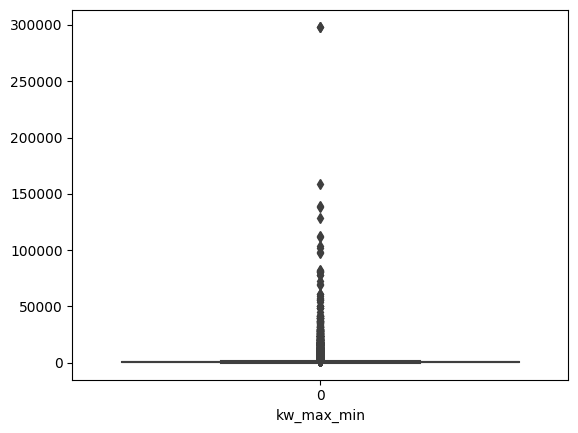

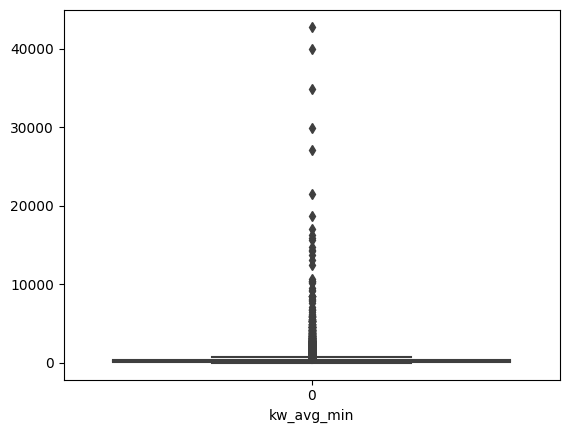

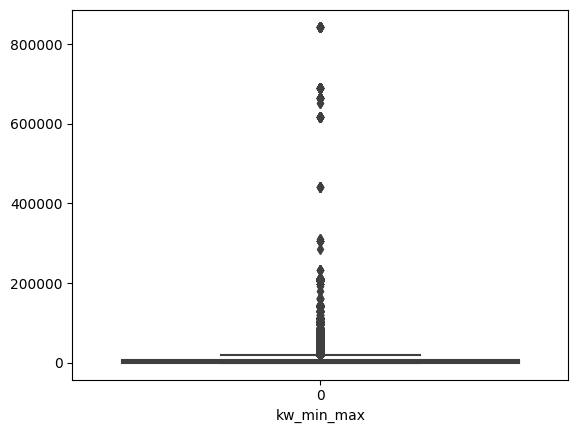

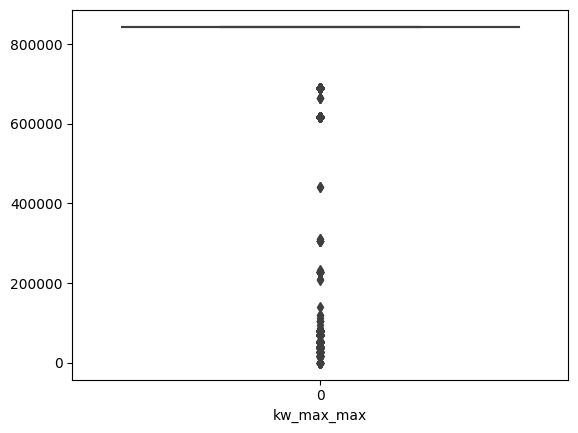

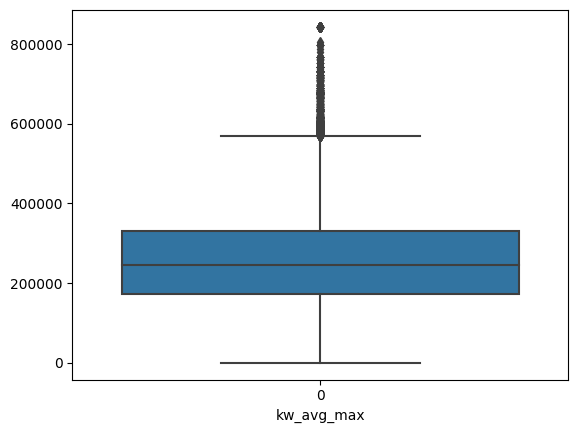

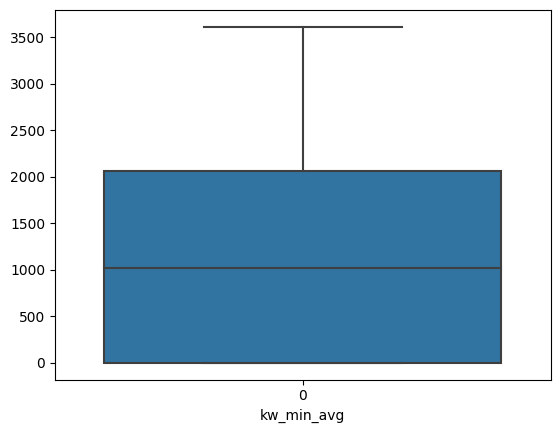

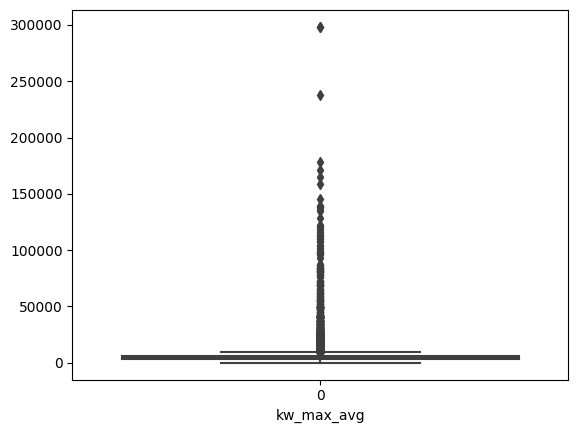

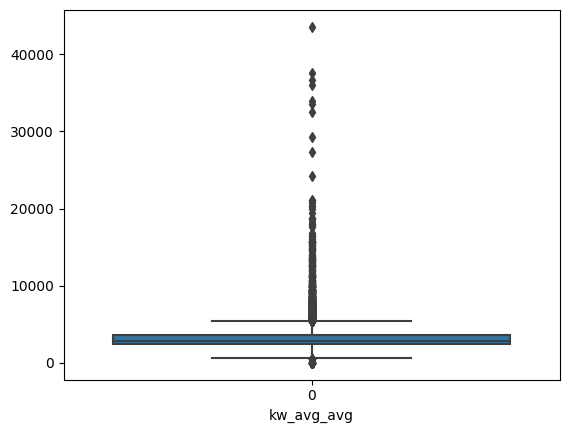

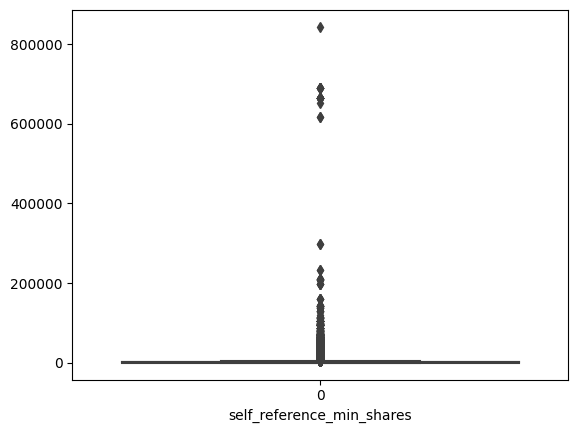

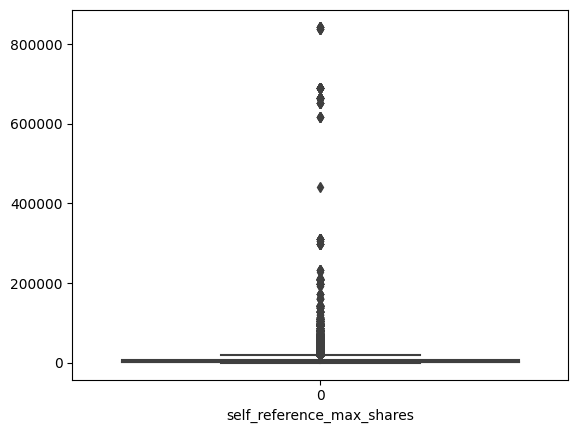

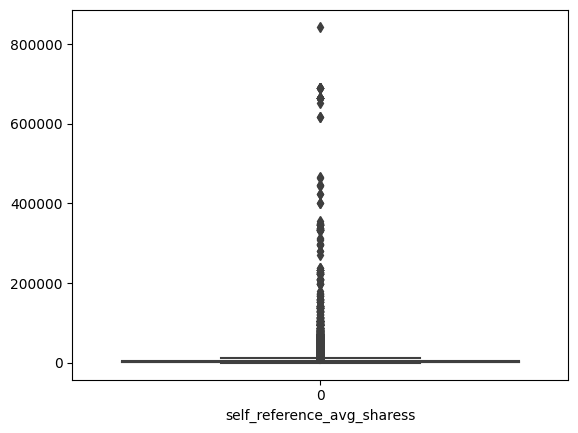

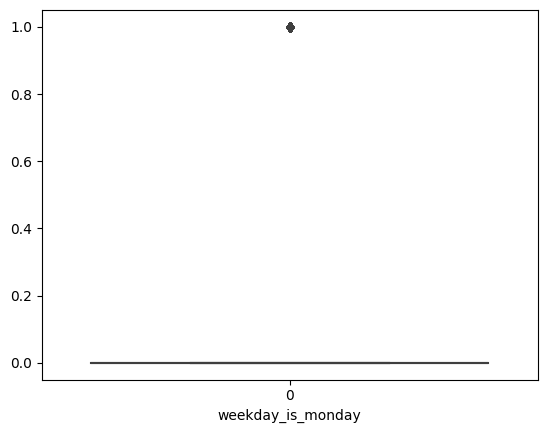

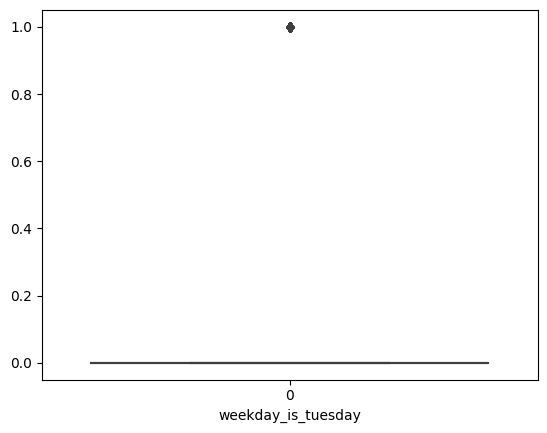

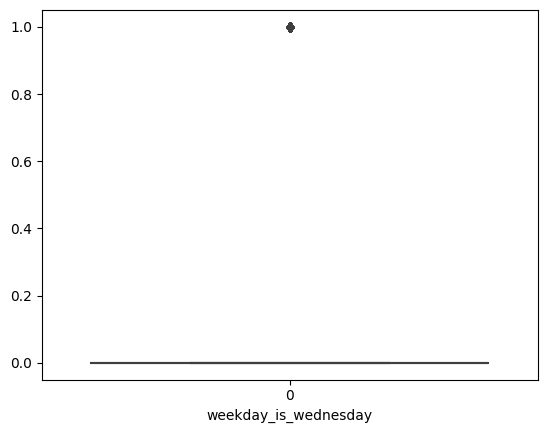

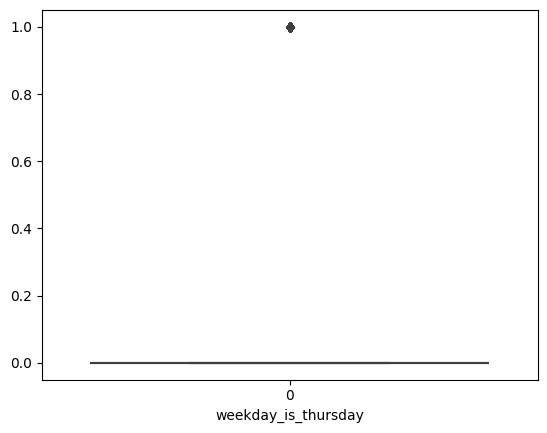

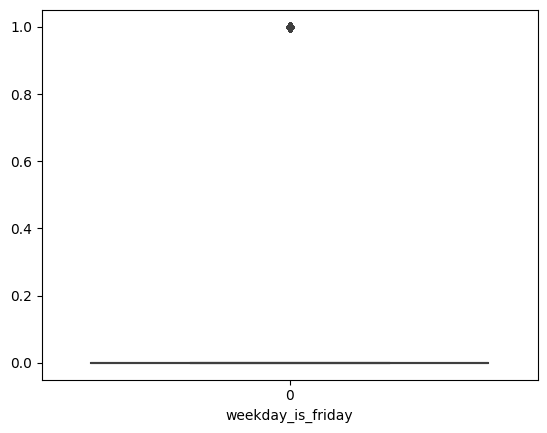

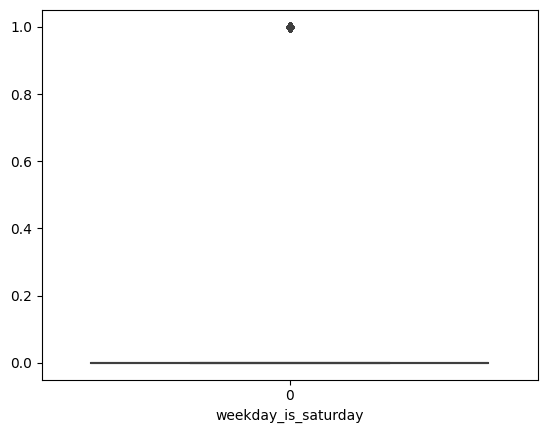

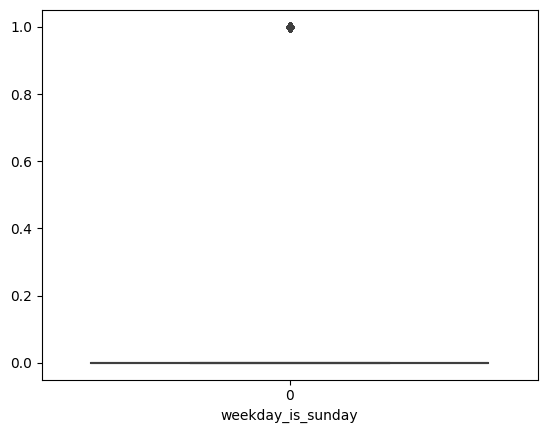

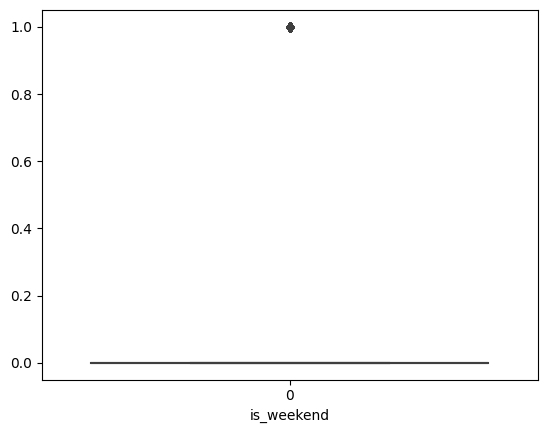

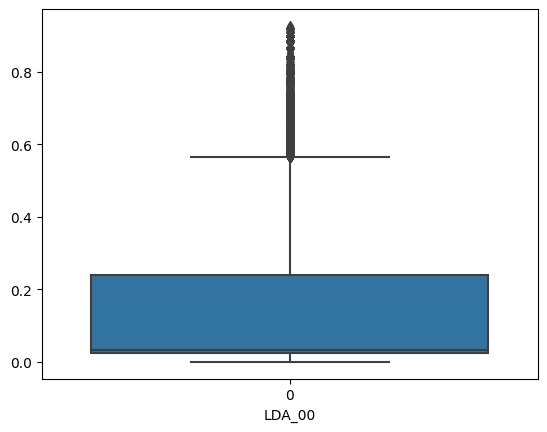

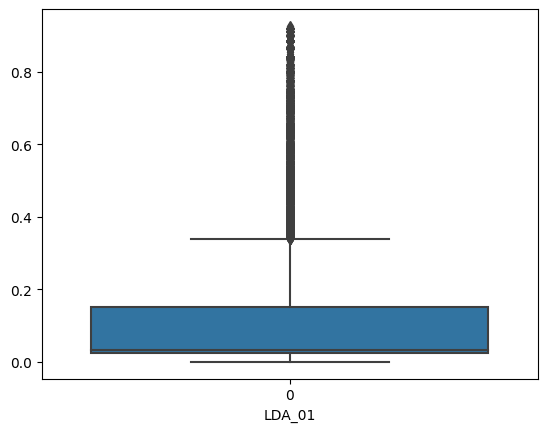

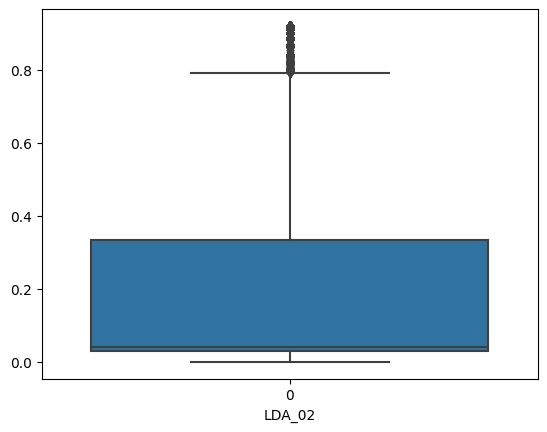

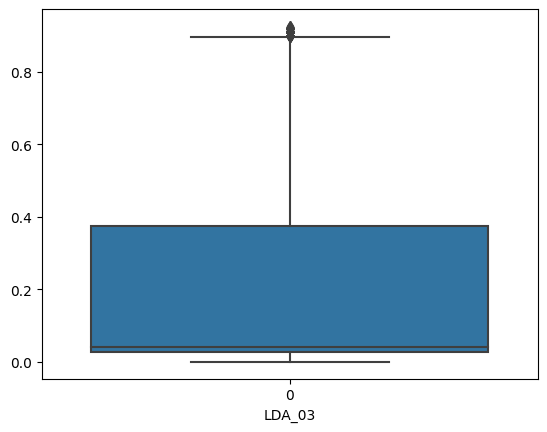

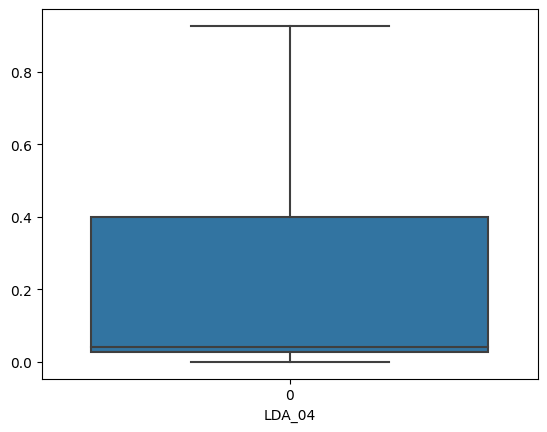

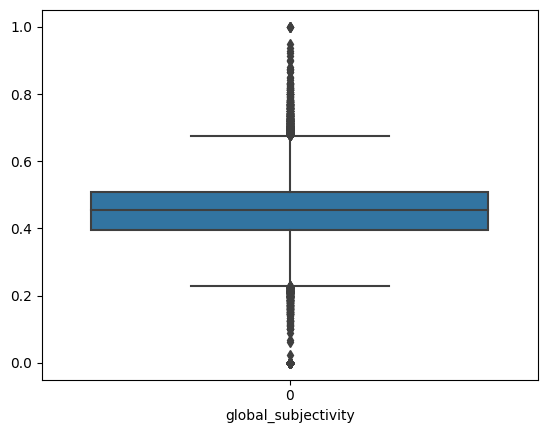

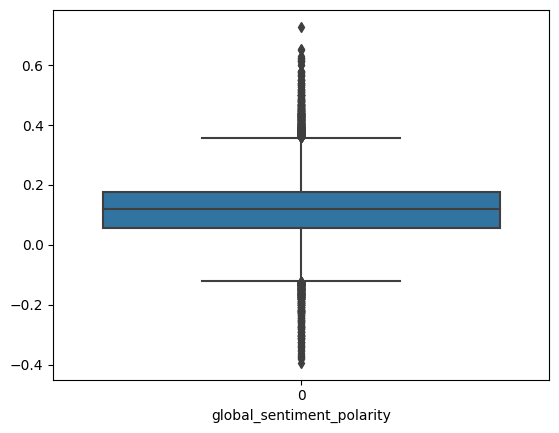

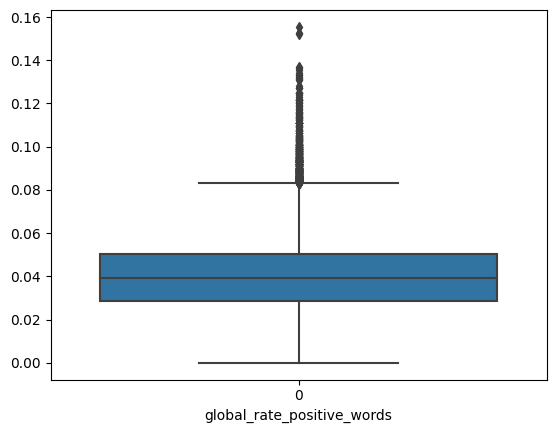

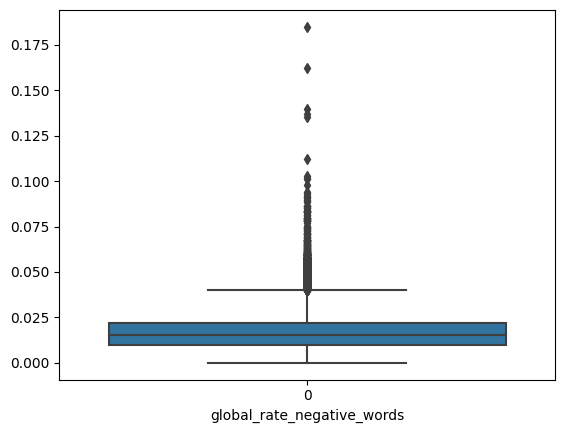

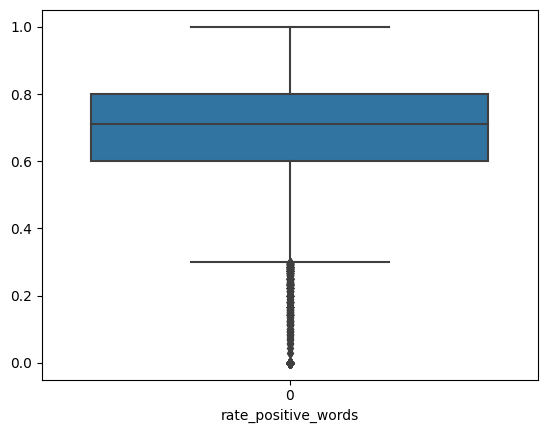

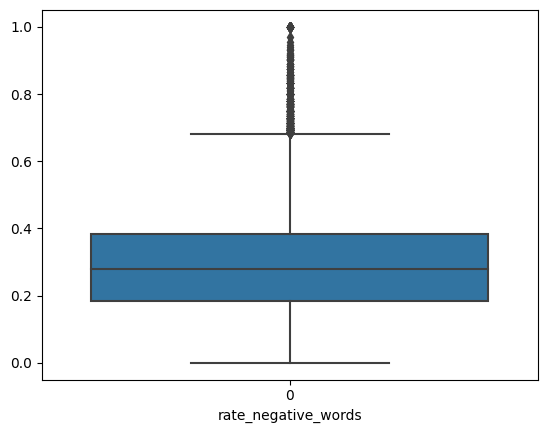

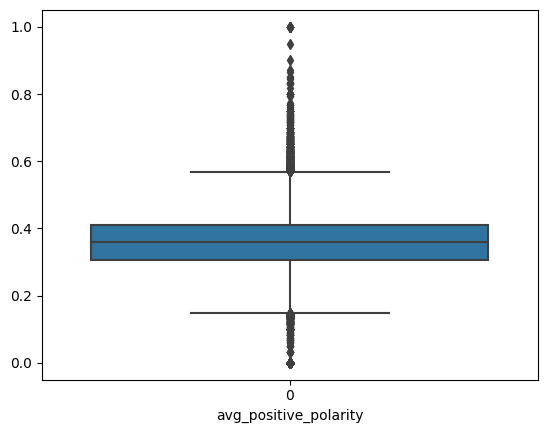

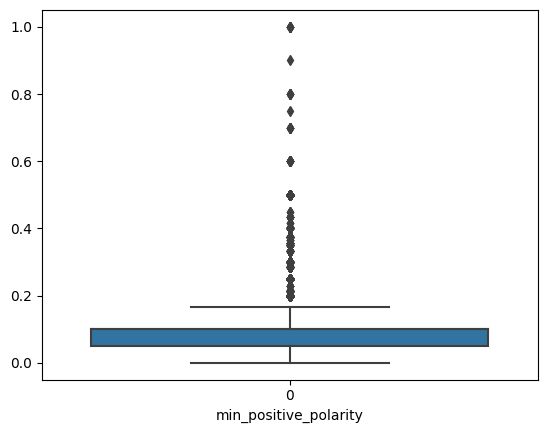

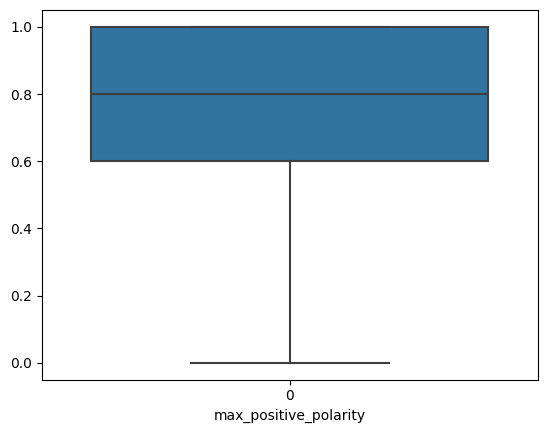

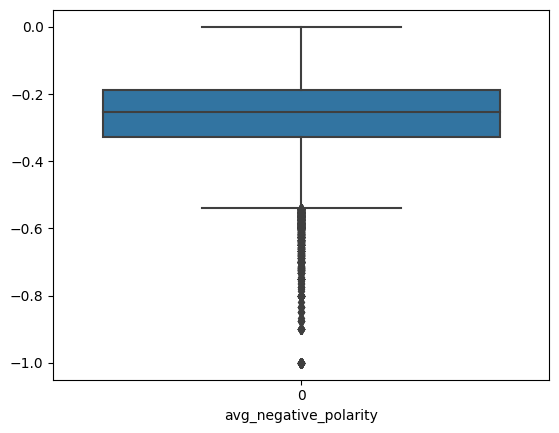

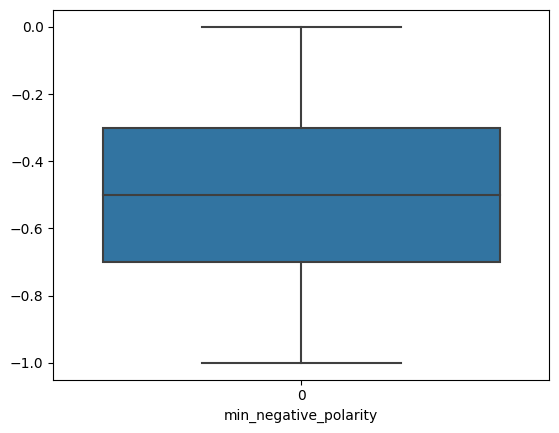

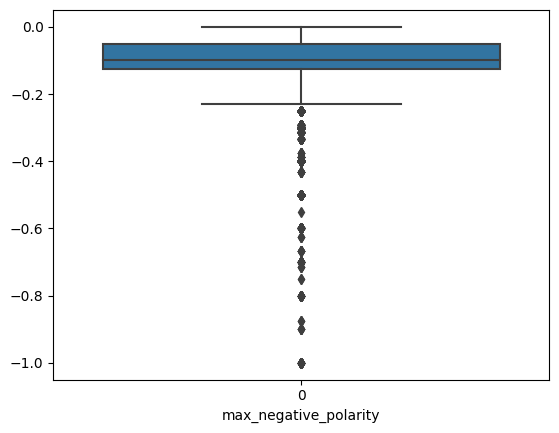

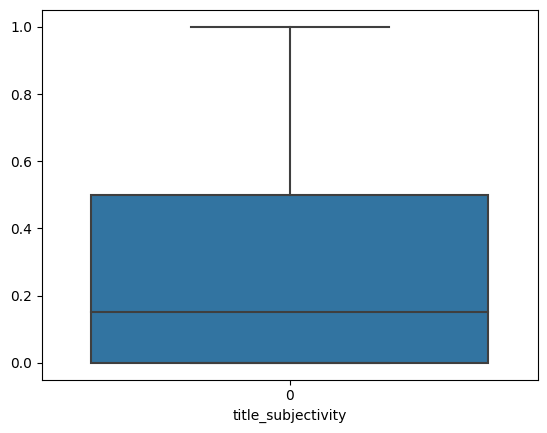

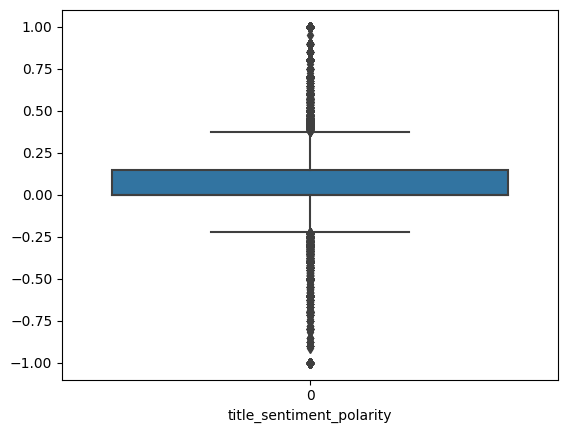

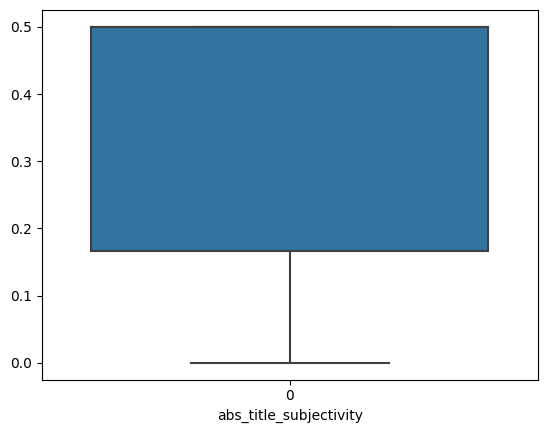

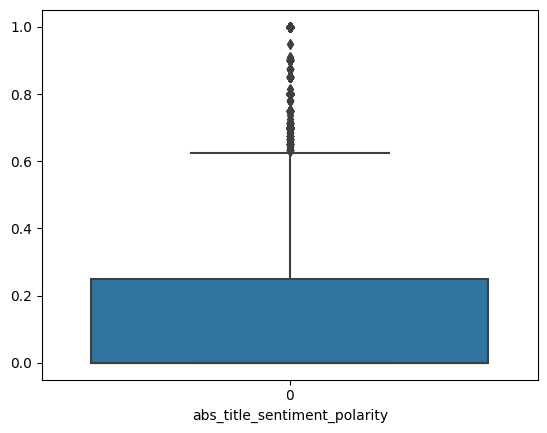

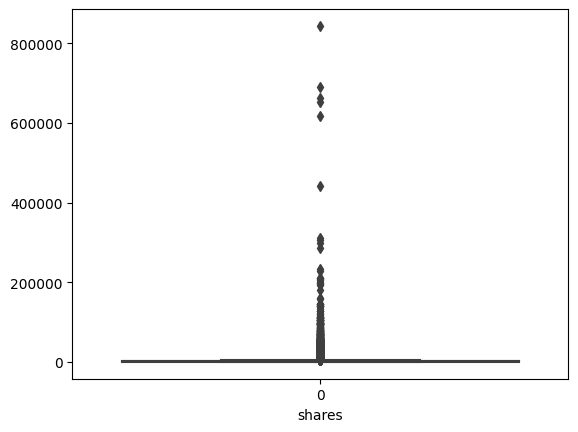

In [5]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

Z analizy powyższych wykresów wynika, że większość z cech nie posiada wielu danych odstających. Wyjątkiem jest cecha będąca naszym celem, czyli shares, gdzie widać znaczy rozstrzał między wartościami.

In [6]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1]
print(target.shape)

(39644,)


Wykres pudełkowy celu.

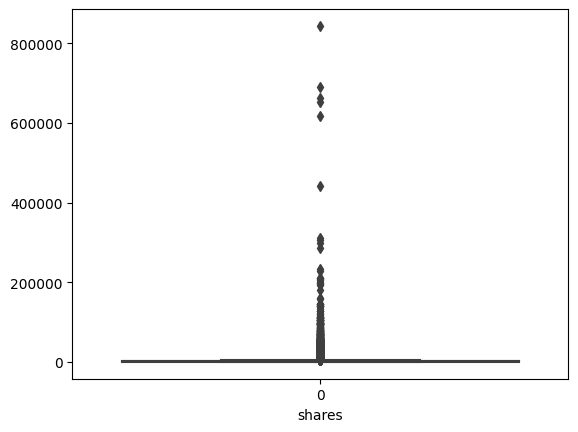

In [7]:
sns.boxplot(target)
plt.xlabel("shares")
plt.show()

In [8]:
target.max()

843300

(array([3.7459e+04, 1.3670e+03, 3.8900e+02, 1.4200e+02, 8.4000e+01,
        6.1000e+01, 3.1000e+01, 2.3000e+01, 1.4000e+01, 1.6000e+01,
        1.4000e+01, 8.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

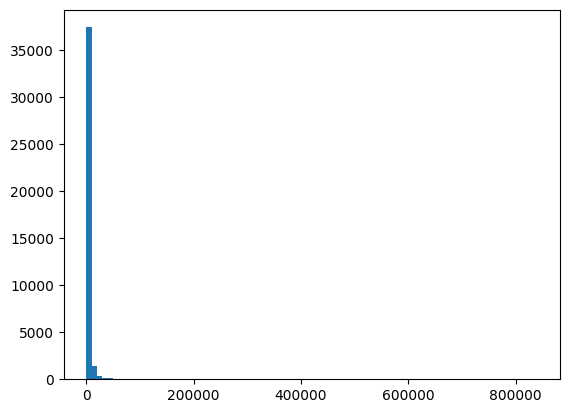

In [9]:

plt.hist(target, bins=np.arange(target.min(), target.max()+1, 10_000))

Po analizie histogramu oraz wykresu pudełkowego widoczne stają się różnice między wartościami w danych, aby zminimalizować problem generowany przez dane odstające zostaną one odrzucone.

In [10]:
Q1 = df['shares'].quantile(q=0.25) 
Q3 = df['shares'].quantile(q=0.75)

IQR = Q3-Q1
# pierwszy kwantyl
print("Pierwszy kwantyl: ", Q1)
# drugi kwantyl
print("Trzeci kwantyl: ", Q3)
# rozstęp międzykwantyly
print("Rozstęp międzykwantylny: ", IQR)
extreme_outliers_bound = Q3+(IQR*3)
print("Granica odcinająca ekstremalnie odstające wartości: ",extreme_outliers_bound)

Pierwszy kwantyl:  946.0
Trzeci kwantyl:  2800.0
Rozstęp międzykwantylny:  1854.0
Granica odcinająca ekstremalnie odstające wartości:  8362.0


In [11]:
print("Wielkość macierzy przed odcięciem wartości odstających: ", df.shape)
df_old = df
df.drop(df[df.shares > extreme_outliers_bound].index, inplace=True)
print("Wielkość macierzy po odcięciu wartości odstających: ", df.shape)

Wielkość macierzy przed odcięciem wartości odstających:  (39644, 59)
Wielkość macierzy po odcięciu wartości odstających:  (36879, 59)


In [12]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,...,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000
mean,10.397652,548.003878,0.549837,1.000054,0.691710,10.697416,3.301716,4.392391,1.207245,4.556879,...,0.095102,0.755694,-0.258127,-0.519999,-0.107108,0.278315,0.069762,0.341817,0.153017,1916.493289
std,2.111650,466.667431,3.650036,5.423444,3.384602,11.048906,3.858062,8.148712,3.995676,0.824072,...,0.070565,0.246156,0.126665,0.289563,0.094532,0.321649,0.261200,0.189089,0.222884,1539.713392
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,249.000000,0.471080,1.000000,0.626766,4.000000,1.000000,1.000000,0.000000,4.480788,...,0.050000,0.600000,-0.326062,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,920.000000
50%,10.000000,414.000000,0.538700,1.000000,0.690789,7.000000,3.000000,1.000000,0.000000,4.666667,...,0.100000,0.800000,-0.251543,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1300.000000
75%,12.000000,718.000000,0.607323,1.000000,0.754491,13.000000,4.000000,4.000000,1.000000,4.857143,...,0.100000,1.000000,-0.185733,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2300.000000
max,23.000000,7764.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,8300.000000


In [13]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1]
print(target.shape)
print(target.loc[:10])

(36879,)
0      593
1      711
2     1500
3     1200
4      505
5      855
6      556
7      891
8     3600
9      710
10    2200
Name: shares, dtype: int64


<AxesSubplot: >

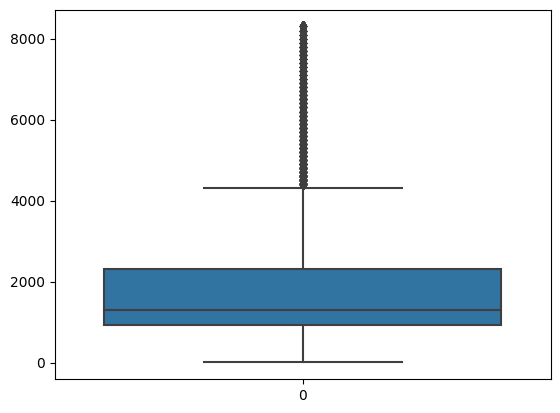

In [14]:
sns.boxplot(target)

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

data.hist(bins=100, figsize=(100,100))
plt.show()

import seaborn as sb

sb.pairplot(data, diag_kind="kde")

from pandas.plotting import scatter_matrix

scatter_m = scatter_matrix(data, figsize=(100,100), diagonal="kde")

In [16]:
data_np = np.array(data, dtype=np.int16)
target_np = np.array(target, dtype=np.int16)

In [17]:
print("First client in database")
print(data_np[1,:])
print('---Mean---')
print(data_np.mean(axis=0))
print('--std---')
print(data_np.std(axis=0))

First client in database
[  9 255   0   0   0   3   1   1   0   4   4   0   0   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
---Mean---
[ 1.03976518e+01  5.48003878e+02  1.90081076e-02  2.82545622e-02
  1.76252068e-02  1.06974159e+01  3.30171642e+00  4.39239133e+00
  1.20724532e+00  4.00848721e+00  7.20968573e+00  5.22519591e-02
  1.78855175e-01  1.62639985e-01  5.80818352e-02  1.87993167e-01
  2.19420266e-01  2.61909759e+01  1.01051951e+03  3.04242604e+02
  2.90515594e+03 -8.14325096e+03  5.85250522e+02  1.09907408e+03
  5.10349700e+03  3.07230023e+03  2.18519700e+03  4.04851222e+03
  3.35761143e+03  1.67141191e-01  1.86772960e-01  1.88779522e-01
  1.84169853e-01  1.44174191e-01  6.09832154e-02  6.79790667e-02
  1.28962282e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.08462811e-04  0.00000000e+00
  0.00000000

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_np)

In [19]:
print("First client in database")
print(scaled_data[1,:])
print('---Mean---')
print(scaled_data.mean(axis=0))
print('--std---')
print(scaled_data.std(axis=0))

First client in database
[-0.66188558 -0.62787294 -0.00520734 -0.00520734 -0.00520734 -0.69667714
 -0.59660724 -0.41631578 -0.30214203 -0.01113684 -1.67670906 -0.23480365
 -0.4667033   2.26904154 -0.24832107 -0.48116185 -0.5301878  -0.37563958
 -0.50307563 -0.57525451 -0.32776704  0.67109596 -0.03075665 -0.98041164
 -1.48262053 -2.47199351 -0.46042159 -0.51267984 -0.54281156  2.23225572
 -0.47923783 -0.48240077 -0.47512666 -0.41044132 -0.25484052 -0.27006902
 -0.38478034  0.          0.          0.          0.          0.
 -0.01041511  0.          0.          0.         -0.19061614 -0.02805306
 -0.01377846 -0.01377846 -0.76607837  0.03610055  0.3999654   0.03610055
 -0.25520234 -0.06648522  0.         -0.13151273]
---Mean---
[ 3.08269849e-16 -2.42762506e-17 -9.63343279e-19  1.73401790e-18
  2.50469253e-18  2.08082148e-17  9.24809548e-18  3.08269849e-17
  6.35806564e-18  1.47969528e-16  1.78796513e-16  5.39472236e-17
 -1.73401790e-17  1.84961910e-17 -4.00750804e-17  5.24058744e-17
 -3.6

In [20]:
from sklearn.model_selection import train_test_split

news_train_data, news_test_data, \
news_train_target, news_test_target = \
train_test_split(scaled_data,target, test_size=0.2, random_state=10)

In [21]:
print("Training dataset:")
print("news_train_data:", news_train_data.shape)
print("news_train_target:", news_train_target.shape)

print("Testing dataset:")
print("news_test_data:", news_test_data.shape)
print("news_test_target:", news_test_target.shape)

Training dataset:
news_train_data: (29503, 58)
news_train_target: (29503,)
Testing dataset:
news_test_data: (7376, 58)
news_test_target: (7376,)


In [22]:
def printCrossValScore(name, sc):
    print("Cross Validations scores for ", name)
    print("Wyniki: ", sc)
    print("Średnia: ", sc.mean())    
    print("Odchylenie standardowe: ", sc.std())   

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

[ 7.14550858e-02 -2.05424675e+23 -2.67379439e+24  8.14683913e-02
  7.93019885e-02]


In [24]:
printCrossValScore("Linear Regression", scores)

Cross Validations scores for  Linear Regression
Wyniki:  [ 7.14550858e-02 -2.05424675e+23 -2.67379439e+24  8.14683913e-02
  7.93019885e-02]
Średnia:  -5.758438120515409e+23
Odchylenie standardowe:  1.0519881399385761e+24


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
scores = cross_val_score(sgd_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

[-8.92610901e+14 -3.40171400e+14 -4.47840821e+14 -5.44198339e+14
 -1.21702298e+11]


In [26]:
printCrossValScore("SGD Regression", scores)


Cross Validations scores for  SGD Regression
Wyniki:  [-8.92610901e+14 -3.40171400e+14 -4.47840821e+14 -5.44198339e+14
 -1.21702298e+11]
Średnia:  -444988632489420.5
Odchylenie standardowe:  289520166337203.94


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

[-0.79883973 -0.91321892 -0.81657896 -0.84277381 -0.85963424]


In [28]:
printCrossValScore("Decision Tree Regression", scores)


Cross Validations scores for  Decision Tree Regression
Wyniki:  [-0.79883973 -0.91321892 -0.81657896 -0.84277381 -0.85963424]
Średnia:  -0.846209130436872
Odchylenie standardowe:  0.03950735004869921


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
scores = cross_val_score(knn_reg, news_train_data, news_train_target, scoring='r2', cv=5)
print(scores)

[-0.06235301 -0.04387752 -0.03340138 -0.05684628 -0.05786613]


In [30]:
printCrossValScore("KNN Regression", scores)

Cross Validations scores for  KNN Regression
Wyniki:  [-0.06235301 -0.04387752 -0.03340138 -0.05684628 -0.05786613]
Średnia:  -0.05086886167192697
Odchylenie standardowe:  0.010682403590046324


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    # 'n_neighbors': [3,5,7,10,15], 'weights':['uniform','distance'], 'leaf_size':[15,30,60,90]
    'n_neighbors': [10,15], 'weights':['uniform','distance'], 'leaf_size':[5,15,30]
}


grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring="r2", cv=5, return_train_score=True, verbose=3)
grid_search.fit(news_train_data, news_train_target)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.208, test=0.015) total time=   0.4s
[CV 2/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.202, test=0.027) total time=   0.4s
[CV 3/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.199, test=0.036) total time=   0.4s
[CV 4/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.203, test=0.027) total time=   0.4s
[CV 5/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.203, test=0.021) total time=   0.4s
[CV 1/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=0.014) total time=   0.5s
[CV 2/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=0.025) total time=   0.5s
[CV 3/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=0.037) total time=   0.4s
[CV 4/5] END leaf_size=5, n_neighbors=10, weight

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [5, 15, 30], 'n_neighbors': [10, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2', verbose=3)

In [32]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.0493453820130467
{'leaf_size': 5, 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(leaf_size=5, n_neighbors=15, weights='distance')


In [33]:
lin_reg.fit(news_train_data, news_train_target)
sgd_reg.fit(news_train_data, news_train_target)
tree_reg.fit(news_train_data, news_train_target)
knn_reg = grid_search.best_estimator_
knn_reg.fit(news_train_data, news_train_target)

KNeighborsRegressor(leaf_size=5, n_neighbors=15, weights='distance')

In [34]:
lin_pred = lin_reg.predict(news_test_data)
sgd_pred = sgd_reg.predict(news_test_data)
knn_pred = knn_reg.predict(news_test_data)
tree_pred = tree_reg.predict(news_test_data)

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def printScores():
      global news_test_target, knn_pred, lin_pred, sgd_pred, tree_pred
      print(" linear reg Mean squared error of a taught model: %.2f" % 
            mean_squared_error(news_test_target, lin_pred))
      print(" sgd reg Mean squared error of a taught model: %.2f" % 
            mean_squared_error(news_test_target, sgd_pred))
      print(" knn reg Mean squared error of a taught model: %.2f" % 
            mean_squared_error(news_test_target, knn_pred))
      print(" tree reg Mean squared error of a taught model: %.2f" % 
            mean_squared_error(news_test_target, tree_pred))

      print('linear reg r2 score: %.2f' % r2_score(news_test_target, lin_pred))
      print('sgd reg r2 score: %.2f' % r2_score(news_test_target, sgd_pred))
      print('knn reg r2 score: %.2f' % r2_score(news_test_target, knn_pred))
      print('tree reg r2 score: %.2f' % r2_score(news_test_target, tree_pred))

printScores()

 linear reg Mean squared error of a taught model: 2154597.02
 sgd reg Mean squared error of a taught model: 2413819547160380178432.00
 knn reg Mean squared error of a taught model: 2275197.10
 tree reg Mean squared error of a taught model: 4270937.26
linear reg r2 score: 0.09
sgd reg r2 score: -1021393823086524.75
knn reg r2 score: 0.04
tree reg r2 score: -0.81


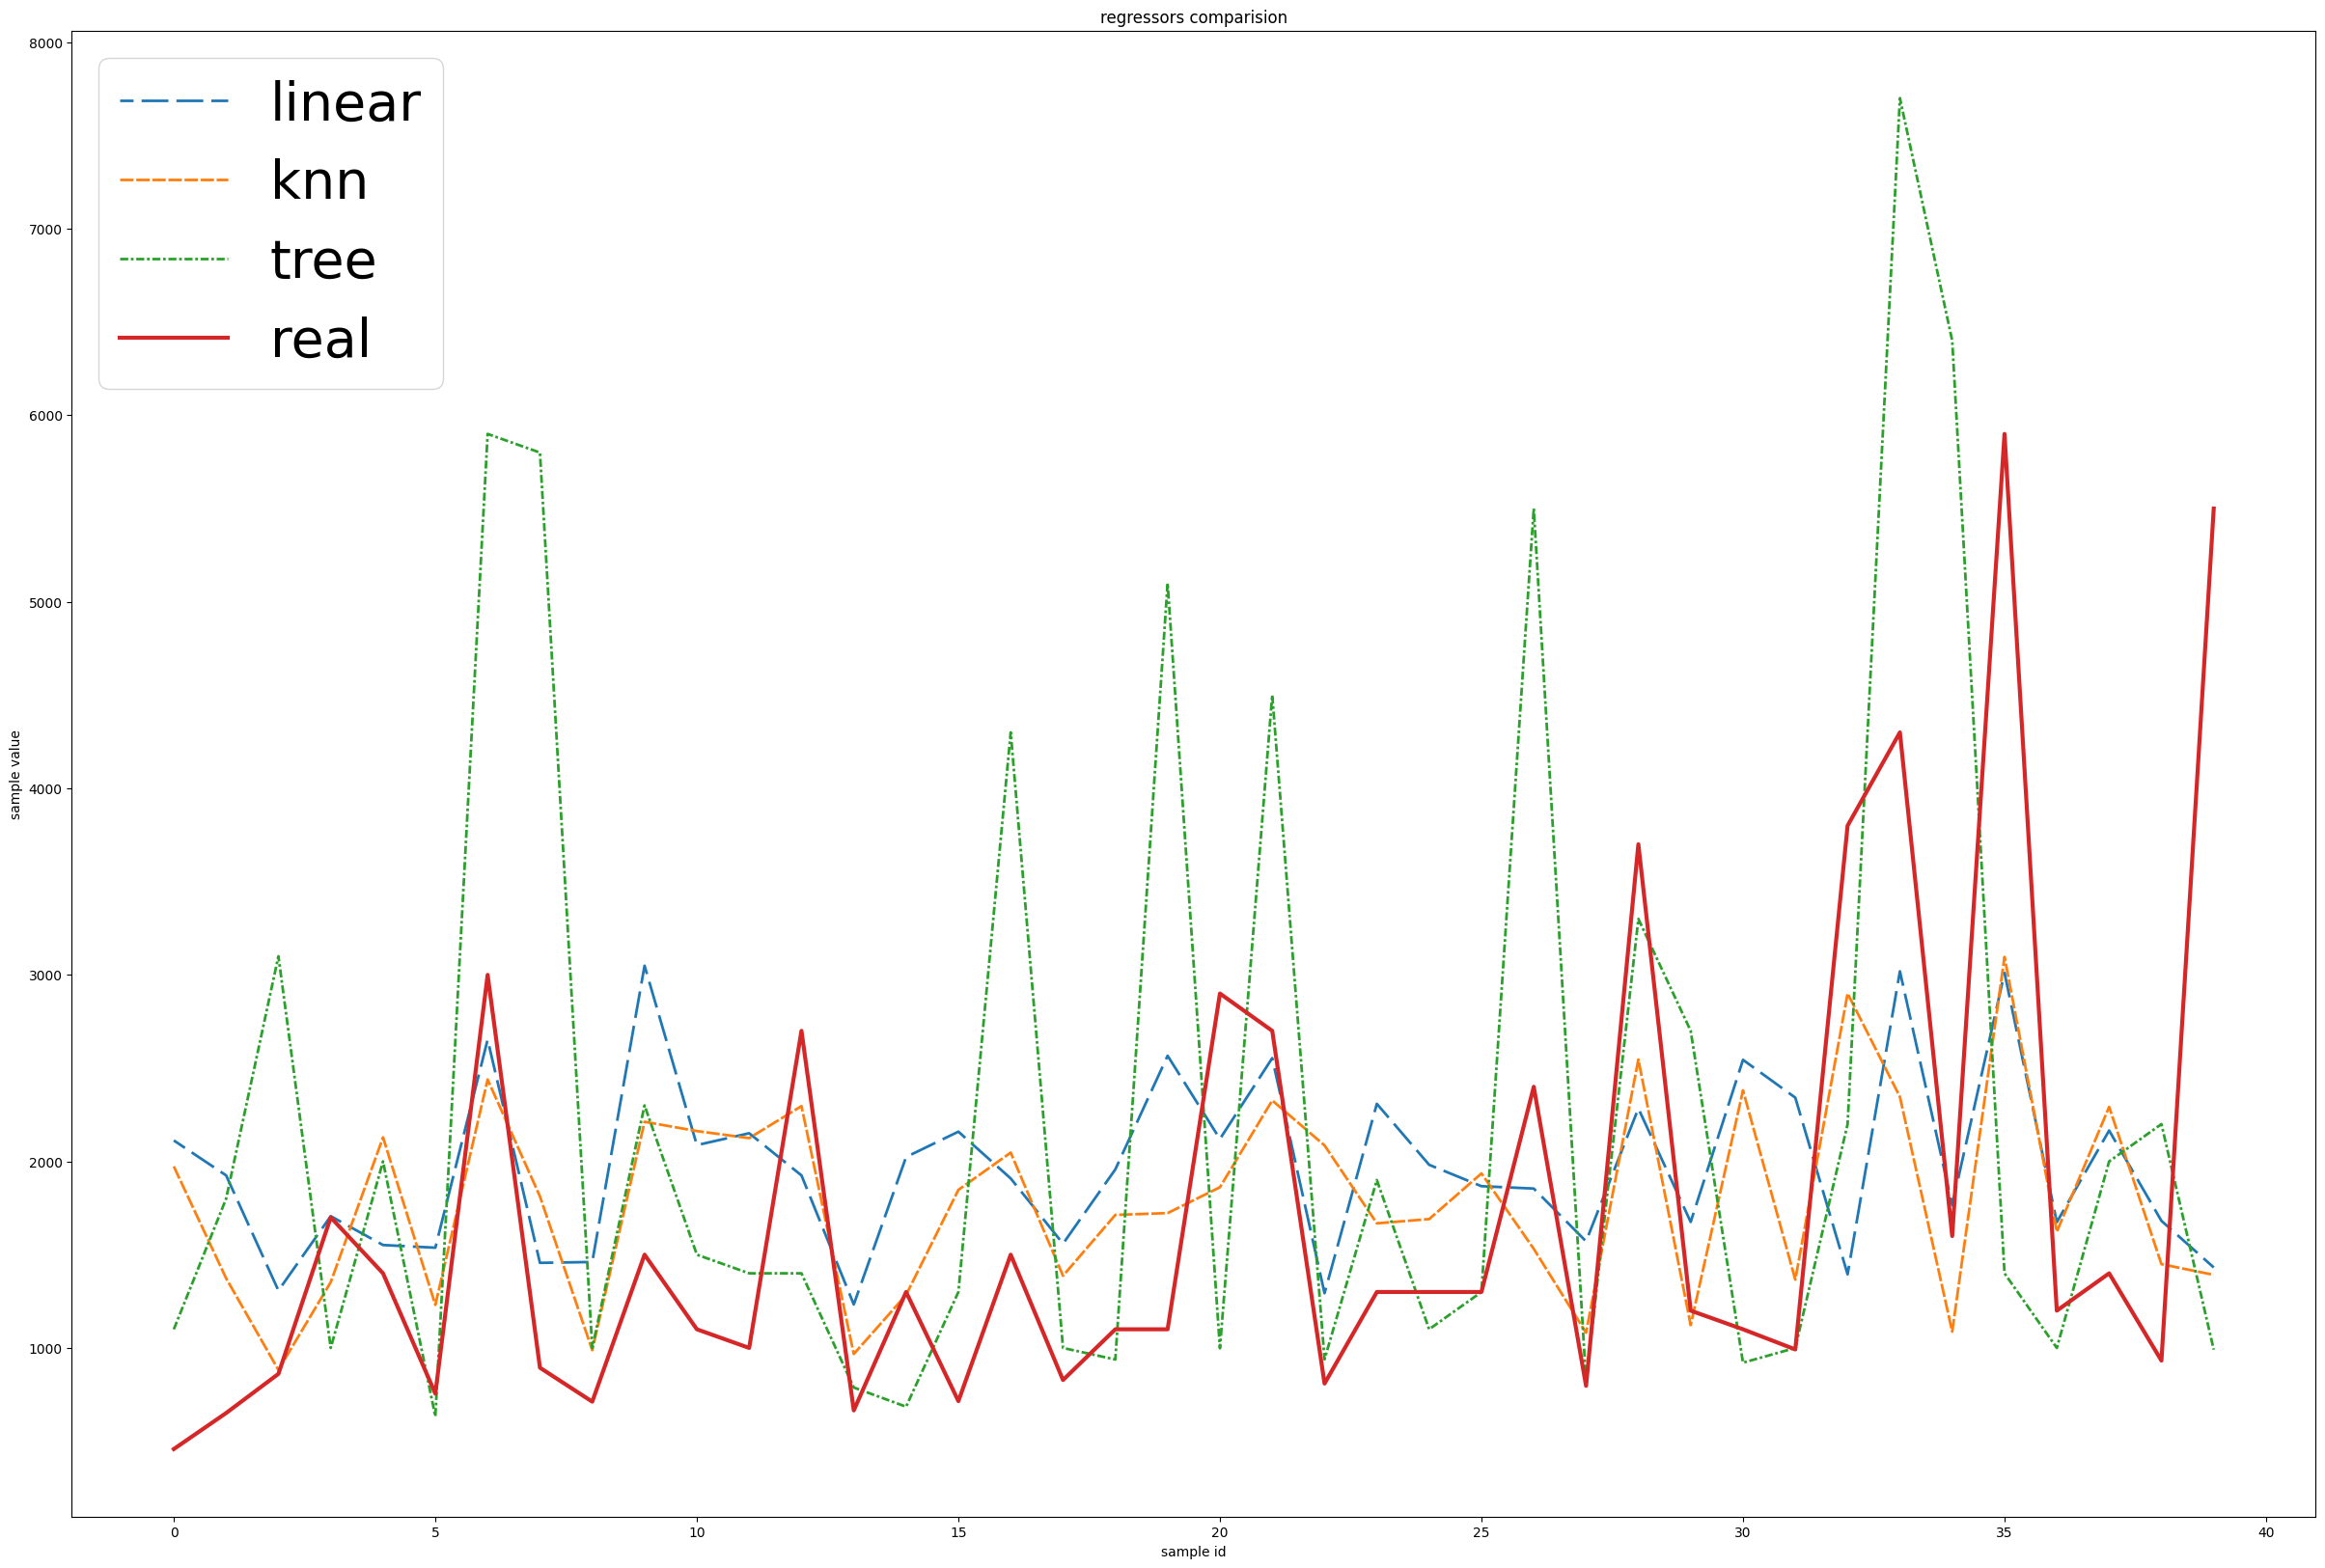

In [36]:
def plotPredictions():
    global news_test_target, knn_pred, lin_pred, sgd_pred, tree_pred

    fig, ax = plt.subplots(figsize=(30,20))
    size=40
    x = range(size)
    offset=1500
    ax.plot(x, lin_pred[offset:offset+size], label='linear', linestyle=(5, (10, 3)), linewidth='2')  # Plot some data on the (implicit) axes.
    # ax.plot(x, sgd_pred[offset:offset+size], label='sgd')  # etc.
    ax.plot(x, knn_pred[offset:offset+size], label='knn', linestyle=(0, (5, 1)), linewidth='2')
    ax.plot(x, tree_pred[offset:offset+size], label='tree', linestyle=(0, (3, 1, 1, 1)), linewidth='2')
    ax.plot(x, news_test_target.iloc[offset:offset+size], label='real', linewidth='3')
    ax.set_xlabel('sample id')
    ax.set_ylabel('sample value')
    ax.set_title("regressors comparision")
    ax.legend(prop={'size': 40})

plotPredictions()

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import RFE

pt = PolynomialFeatures(2, )
normalizer = Normalizer()
scaler = StandardScaler()

news_train_poly = pt.fit_transform(news_train_data)
news_test_poly = pt.fit_transform(news_test_data)

normalized_news_train_poly = normalizer.fit_transform(news_train_data)
normalized_news_test_poly = normalizer.fit_transform(news_test_data)

scaled_news_train_poly = scaler.fit_transform(news_train_data)
scaled_news_test_poly = scaler.fit_transform(news_test_data)


In [38]:
def fitAndScore(regressor,train, test, name):
    regressor.fit(train, news_train_target)
    prediction = regressor.predict(test)
    print("Mean squared error of a "+name+": %.2f" % 
        mean_squared_error(news_test_target, prediction))
    score = regressor.score(test, news_test_target) #r2_score
    print("Variance score "+name+": %.2f" % score)


In [39]:
regressors = (lin_reg, knn_reg, tree_reg, sgd_reg)
names = ("lin_reg", "knn_reg", "tree_reg", "sgd_reg")

for reg, name in zip(regressors, names):
    print(name)
    fitAndScore(reg, news_train_poly, news_test_poly, name+" using polynomial features")
    fitAndScore(reg, normalized_news_train_poly,normalized_news_test_poly, name+" using normalized polynomial features")
    fitAndScore(reg, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features")

lin_reg
Mean squared error of a lin_reg using polynomial features: 2186229645903209496051712.00
Variance score lin_reg using polynomial features: -925090468672807552.00
Mean squared error of a lin_reg using normalized polynomial features: 2138207.93
Variance score lin_reg using normalized polynomial features: 0.10
Mean squared error of a lin_reg using scaled polynomial features: 787749702566830304684670976.00
Variance score lin_reg using scaled polynomial features: -333331744407548461056.00
knn_reg
Mean squared error of a knn_reg using polynomial features: 2285081.93
Variance score knn_reg using polynomial features: 0.03
Mean squared error of a knn_reg using normalized polynomial features: 2273338.11
Variance score knn_reg using normalized polynomial features: 0.04
Mean squared error of a knn_reg using scaled polynomial features: 2278125.70
Variance score knn_reg using scaled polynomial features: 0.04
tree_reg
Mean squared error of a tree_reg using polynomial features: 4490556.69
Varia

In [40]:

# for reg, name in zip(regressors, names):
#     rfe = RFE(estimator=reg, n_features_to_select=45)
#     fitAndScore(reg, news_train_poly, news_test_poly, name+" using polynomial features")
#     fitAndScore(reg, normalized_news_train_poly,normalized_news_test_poly, name+" using normalized polynomial features")
#     fitAndScore(reg, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features")

In [41]:
news_train_poly.shape

(29503, 1770)

In [42]:
# from sklearn.feature_selection import RFE
# features = [50, 40, 30, 25, 15, 10, 5]
# mse = []
# r2_score = []
# # regressors = [lin_reg, sgd_reg, tree_reg]

# for reg, name in zip(regressors, names):
#     f_mse = []
#     f_r2 = []
#     for f in features:
#         print("name: ", name,", Features:",f)
#         sel_ = RFE(estimator=reg, n_features_to_select=f)
#         sel_.fit(news_train_data, news_train_target)
#         # fitAndScore(sel_, news_train_data, news_test_data, name+" using normal features")
#         # fitAndScore(sel_, scaled_data, news_test_data, name+" using normalized polynomial features")
#         # fitAndScore(sel_, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features") 
#         print(sel_.score(news_test_data, news_test_target))
#         # ms_err = mean_squared_error(housig_test_t, sel_.predict(housig_test_poly_arr[i]))
#         # f_r2.append(r_err)
#         # f_mse.append(ms_err)
        
#         # print("degree: ", i,", Features:",f," - Linear Regression variance score using _selected_ polynomial features: %.2f" % r_err)
        
#     # mse.append(f_mse)
#     # r2_score.append(f_r2)

In [43]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=0.5, max_iter=5000,)
lasso_r.fit(news_train_poly, news_train_target)

print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(news_test_target, lasso_r.predict(news_test_poly)))
score = lasso_r.score(news_test_poly, news_test_target) #r2_score
print("Lasso regression variance score: %.2f" % score)

Mean squared error of a linear moderl: 2180553.43
Lasso regression variance score: 0.08


c:\Users\Szymek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+08, tolerance: 7.000e+06
  model = cd_fast.enet_coordinate_descent(


In [44]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=0.5, max_iter=5000,)
lasso_r.fit(news_train_data, news_train_target)

pred = lasso_r.predict(news_test_data)

print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(news_test_target, pred))
score = lasso_r.score(news_test_data, news_test_target) #r2_score
print("Lasso regression variance score: %.2f" % score)

Mean squared error of a linear moderl: 2154528.17
Lasso regression variance score: 0.09


In [45]:
for i in range(20):
    print("Prediceted: "+str(pred[i])+", real:"+str(news_test_target.iloc[i]))

Prediceted: 1872.8619069797323, real:1700
Prediceted: 1191.9117897588233, real:489
Prediceted: 1623.4456765875036, real:1400
Prediceted: 1583.0186212950687, real:716
Prediceted: 2606.4931651428187, real:950
Prediceted: 1364.134844998325, real:2900
Prediceted: 1994.8470845919971, real:1900
Prediceted: 1486.0634936031465, real:958
Prediceted: 1826.6621884613116, real:1400
Prediceted: 2541.239789844484, real:2300
Prediceted: 2308.630909364852, real:6300
Prediceted: 2203.08256743929, real:3200
Prediceted: 1439.3570196942053, real:1100
Prediceted: 2114.36769001403, real:2900
Prediceted: 2090.2998879437027, real:4500
Prediceted: 2172.389700503324, real:2200
Prediceted: 1732.1653918596257, real:1300
Prediceted: 1463.4817838327701, real:1600
Prediceted: 2318.877941765087, real:1400
Prediceted: 1272.919666512881, real:631
